<a href="https://colab.research.google.com/github/SameerMujeeb2000/SameerMujeeb2000/blob/main/Housing_Prices_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [53]:
dataset = pd.read_csv("/content/Housing.csv")
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [54]:
# Checking missing values in our data
dataset.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


**Observation 1**: There are no missing values in our data.

In [55]:
# Checking for duplicate values
print(dataset.shape)
dataset.drop_duplicates(inplace=True)
print(dataset.shape)

(545, 13)
(545, 13)


**Observation 2**: There are no duplicate values in our data

In [56]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


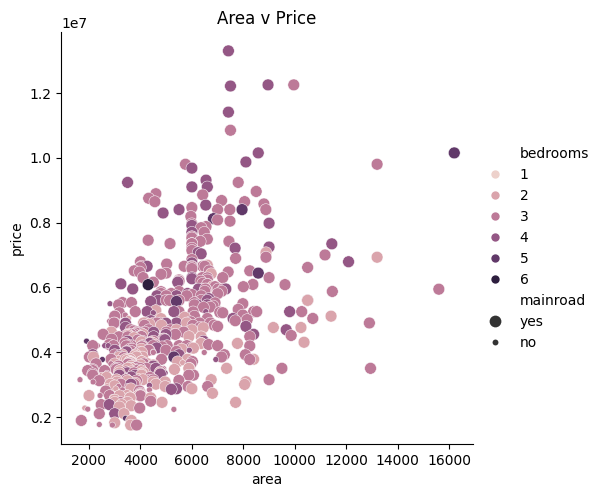

In [57]:
sns.set_palette("colorblind")
sns.relplot(x="area",y="price",kind="scatter",hue="bedrooms",size="mainroad",data=dataset)
plt.title("Area v Price")
plt.show()

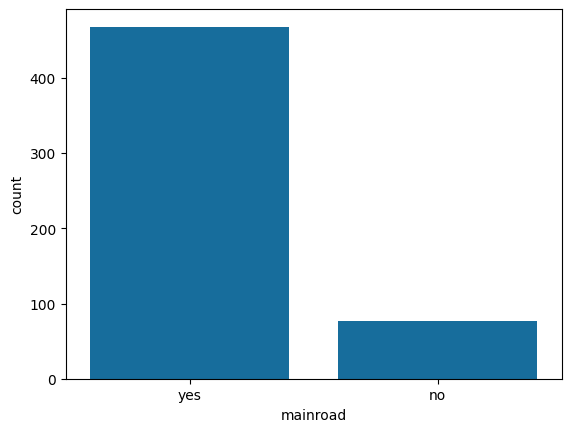

In [58]:
sns.countplot(x="mainroad",data=dataset)
plt.show()

In [59]:
dataset.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

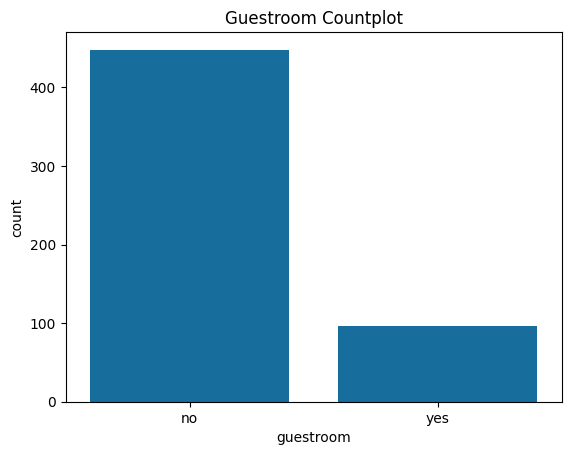

In [60]:
sns.countplot(x="guestroom",data=dataset)
plt.title("Guestroom Countplot")
plt.show()

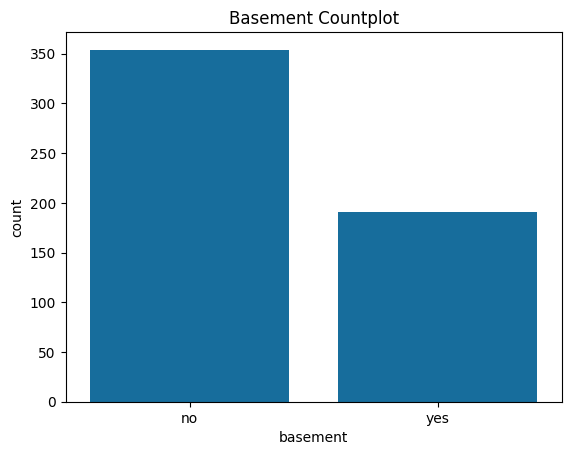

In [61]:
sns.countplot(x="basement",data=dataset)
plt.title("Basement Countplot")
plt.show()

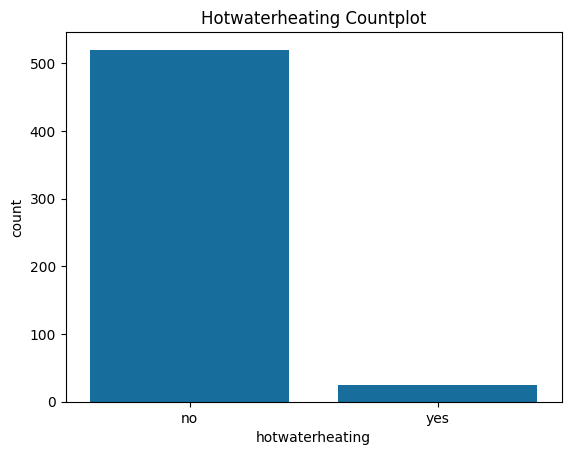

In [62]:
sns.countplot(x="hotwaterheating",data=dataset)
plt.title("Hotwaterheating Countplot")
plt.show()

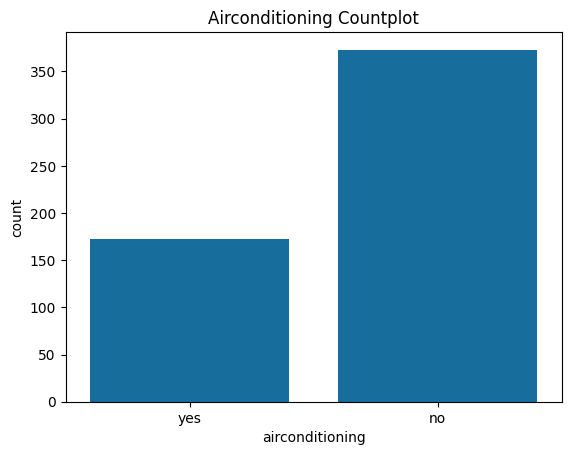

In [63]:
sns.countplot(x="airconditioning",data=dataset)
plt.title("Airconditioning Countplot")
plt.show()

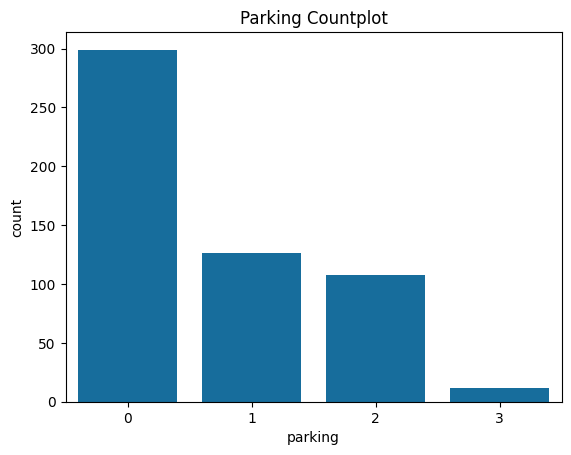

In [64]:
sns.countplot(x="parking",data=dataset)
plt.title("Parking Countplot")
plt.show()

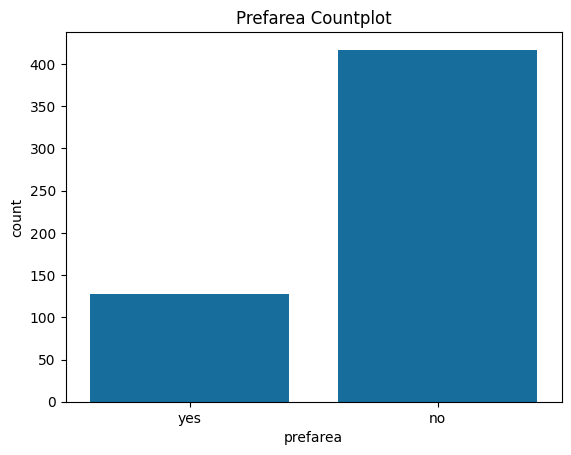

In [65]:
sns.countplot(x="prefarea",data=dataset)
plt.title("Prefarea Countplot")
plt.show()

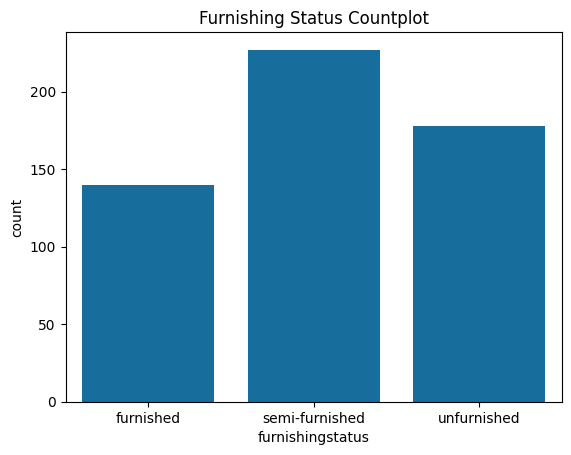

In [66]:
sns.countplot(x="furnishingstatus",data=dataset)
plt.title("Furnishing Status Countplot")
plt.show()

In [67]:
#Working on categorical data
dataset["mainroad"] = dataset["mainroad"].str.strip()
dataset["mainroad"]=dataset["mainroad"].map({"yes":"1" , "no":"0"})
dataset["mainroad"].unique()

array(['1', '0'], dtype=object)

In [68]:
dataset["mainroad"]=dataset["mainroad"].astype(int)
dataset["mainroad"].value_counts()

,count
mainroad,
1,468
0,77


In [69]:
dataset["guestroom"]=dataset["guestroom"].map({"yes":"1" , "no":"0"})
dataset["guestroom"].unique()

array(['0', '1'], dtype=object)

In [70]:
dataset["guestroom"]=dataset["guestroom"].astype(int)
dataset["guestroom"].value_counts()

,count
guestroom,
0,448
1,97


In [71]:
dataset["basement"]=dataset["basement"].map({"yes":"1","no":"0"})
dataset["basement"].value_counts()

,count
basement,
0,354
1,191


In [72]:
dataset["basement"]=dataset["basement"].astype(int)

In [73]:
dataset["hotwaterheating"]=dataset["hotwaterheating"].map({"yes":"1","no":"0"})
dataset["hotwaterheating"].value_counts()

,count
hotwaterheating,
0,520
1,25


In [74]:
dataset["hotwaterheating"]=dataset["hotwaterheating"].astype(int)

In [75]:
dataset["airconditioning"]=dataset["airconditioning"].map({"yes":"1","no":"0"})
dataset["airconditioning"].value_counts()

,count
airconditioning,
0,373
1,172


In [76]:
dataset["airconditioning"]=dataset["airconditioning"].astype(int)

In [77]:
dataset["prefarea"]=dataset["prefarea"].map({"yes":"1", "no":"0"})
dataset["prefarea"].unique()

array(['1', '0'], dtype=object)

In [78]:
dataset["prefarea"]=dataset["prefarea"].astype(int)

In [79]:
dataset["furnishingstatus"]=dataset["furnishingstatus"].map({"unfurnished":"0" , "semi-furnished":"1" , "furnished":"2"})
dataset["furnishingstatus"].unique()

array(['2', '1', '0'], dtype=object)

In [80]:
dataset["furnishingstatus"]=dataset["furnishingstatus"].astype(int)

In [81]:
dataset.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,int64
guestroom,int64
basement,int64
hotwaterheating,int64
airconditioning,int64


In [82]:
dataset.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


**Observation 3**: The encoding part has been completed. Now outliers have to be removed from our data.
Only area column will have to checked since others are discrete variables.



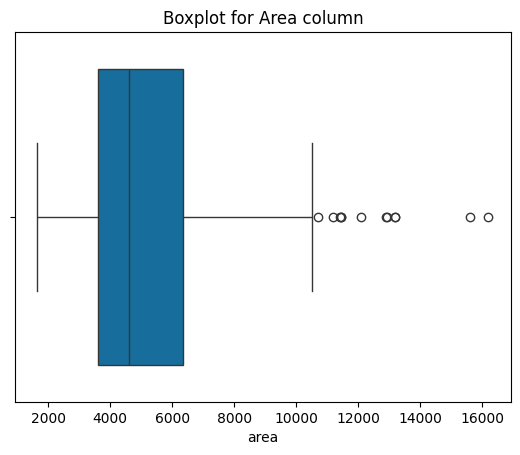

In [83]:
a = sns.boxplot(x="area",data=dataset)
a.set_title("Boxplot for Area column")
plt.show()

In [84]:
# Outlier removal
q1 = dataset["area"].quantile(0.25)
q3 = dataset["area"].quantile(0.75)
IQR = q3 - q1
min_value = q1 - (1.5 * IQR)
max_value = q3 + (1.5 * IQR)
data = dataset[(dataset["area"]>=min_value)&(dataset["area"]<=max_value)]

In [85]:
print(max_value)

10500.0


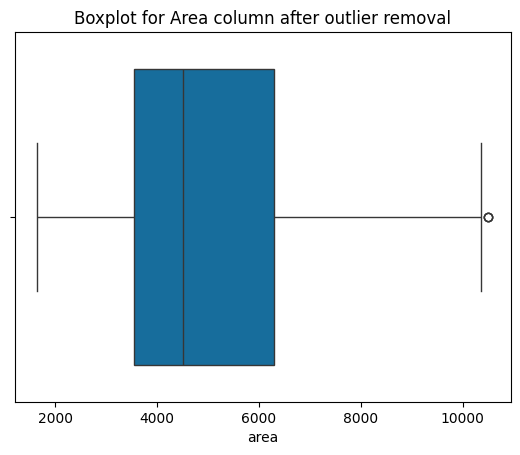

In [86]:
b = sns.boxplot(x="area",data=data)
b.set_title("Boxplot for Area column after outlier removal")
plt.show()

In [87]:
data["area"].max()

10500

**Observation 4:** The only outlier is equal to the maximum permitted value. Therefore, it is okay to keep it.

In [88]:
data.shape

(533, 13)

**Observation 5:** 12 rows have been lost during outlier removal process.

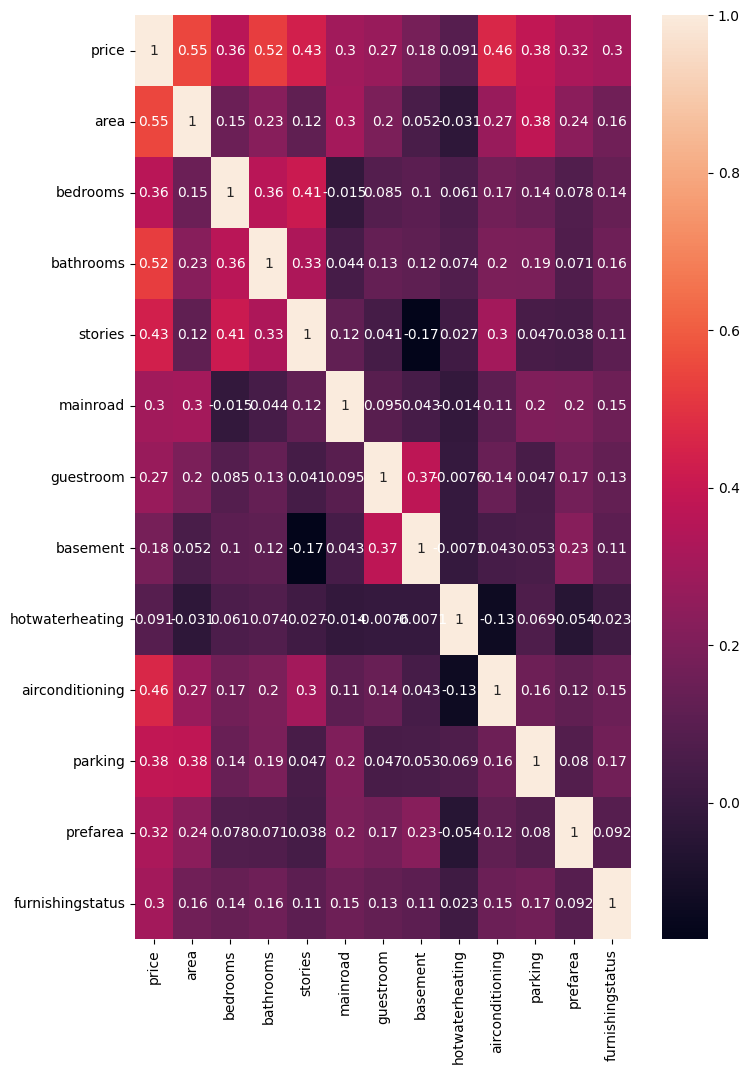

In [89]:
plt.figure(figsize=(8,12))
sns.heatmap(data.corr(),annot=True)
plt.show()

In [90]:
data.drop(columns=["hotwaterheating","basement"])

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,2


In [91]:
x = data.drop(columns=["price"])
y = data["price"]

In [92]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
ss = StandardScaler()
ss.fit(x)
x = pd.DataFrame(ss.transform(x),columns=x.columns)

In [93]:
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.316021,1.413578,1.426798,1.367607,0.410925,-0.468700,-0.732136,-0.217143,1.467599,1.531554,1.835443,1.422179
1,2.146871,1.413578,5.429342,2.515536,0.410925,-0.468700,-0.732136,-0.217143,1.467599,2.696059,-0.544827,1.422179
2,2.686383,0.053583,1.426798,0.219679,0.410925,-0.468700,1.365867,-0.217143,-0.681385,1.531554,1.835443,0.103881
3,1.359182,1.413578,1.426798,0.219679,0.410925,-0.468700,1.365867,-0.217143,1.467599,2.696059,1.835443,1.422179
4,1.316021,1.413578,-0.574474,0.219679,0.410925,2.133561,1.365867,-0.217143,1.467599,1.531554,-0.544827,1.422179
...,...,...,...,...,...,...,...,...,...,...,...,...
528,-1.068626,-1.306412,-0.574474,-0.928250,0.410925,-0.468700,1.365867,-0.217143,-0.681385,1.531554,-0.544827,-1.214417
529,-1.392334,0.053583,-0.574474,-0.928250,-2.433532,-0.468700,-0.732136,-0.217143,-0.681385,-0.797457,-0.544827,0.103881
530,-0.734128,-1.306412,-0.574474,-0.928250,0.410925,-0.468700,-0.732136,-0.217143,-0.681385,-0.797457,-0.544827,-1.214417
531,-1.117182,0.053583,-0.574474,-0.928250,-2.433532,-0.468700,-0.732136,-0.217143,-0.681385,-0.797457,-0.544827,1.422179


In [ ]:
"""pf = PolynomialFeatures(degree=2)
pf.fit(x)
x = pf.transform(x)"""

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [107]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)
lr = LinearRegression()
lr.fit(x_train,y_train)
r2_test = lr.score(x_test, y_test)
print("R2 score based on Linear regression is ",r2_test)

R2 score based on Linear regression is  0.6208250677261011


In [106]:
y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Train MAE: ", train_mae)
print("Test MAE: ", test_mae)


Train MAE:  729720.3704409252
Test MAE:  925957.3736816037


In [105]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=4)
dt.fit(x_train,y_train)
r2_test = dt.score(x_test, y_test)
print("R2 score based on Decision Tree Regressor is ",r2_test)

R2 score based on Decision Tree Regressor is  0.47816335088895434


In [104]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(x_train,y_train)
r2_test = knn.score(x_test, y_test)
print("R2 score based on KNN Regressor is ",r2_test)

R2 score based on KNN Regressor is  0.5372966338105323


In [103]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=20)
rfr.fit(x_train,y_train)
r2_test = rfr.score(x_test, y_test)
print("R2 score based on Random Forest Regressor is ",r2_test)

R2 score based on Random Forest Regressor is  0.5410464395977128


In [102]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(x_train,y_train)
r2_test = svr.score(x_test, y_test)
print("R2 score based on Support Vector Regressor is ", r2_test)

R2 score based on Support Vector Regressor is  -0.11598939655472806


Observation: The other algorithms are doing fine with prediction. However, Support Vector Regressor is not appropriate for the predictive modelling.